#### Bank Marketing
- Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The        classification goal is to predict if the client will subscribe a term deposit (variable y).

- Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


#### Attribute Information:

###### Bank client data$:





 - Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown') 

#### Related with the last contact of the current campaign:

- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g.,  if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

####  Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').

#### Social and economic context attributes:
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no').

### Source
- Dataset from :http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')
pd.set_option('display.max_columns',None)


import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('~/Desktop/Data sets ML/30368_38700_bundle_archive/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


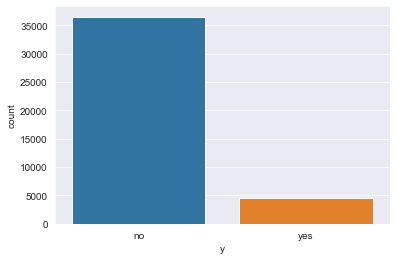

In [3]:
sns.countplot(df['y'])

- This is clearly an imbalanced dataset,by using sampling techniques we need to rectify it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
def missingvalues(df):
    total=df.isnull().sum().sort_values()
    percent=round(((df.isnull().sum().sort_values()/df.index.size)*100),2)
    return pd.concat([total,percent],keys=(['Total','Percent']),axis=1)


In [6]:
missingvalues(df)

,Total,Percent
age,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
nr.employed,0,0.0


In [7]:
df.shape

(41188, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###  Working with the bank client data and understanding it

 -  Bank client data columns:
      - Age
      - job
      - marital
      - education
      - default
      - housing
      - loan
 - Making another dataset for only client columns and doing analysis on it.

In [9]:
Bank_client=df.iloc[:,:7]

In [10]:
Bank_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


### Age

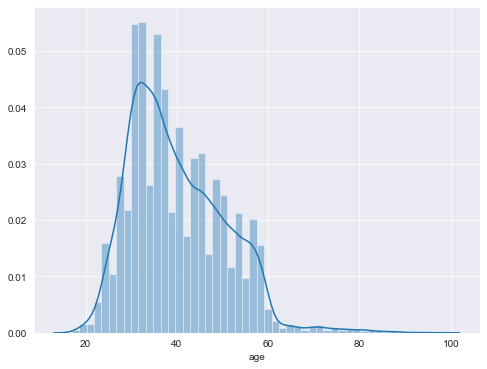

In [11]:
# lets see the age distribution
plt.figure(figsize=(8,6))
sns.distplot(Bank_client['age'])
plt.show()

In [12]:
Bank_client['age'].min(),Bank_client['age'].max()

(17, 98)

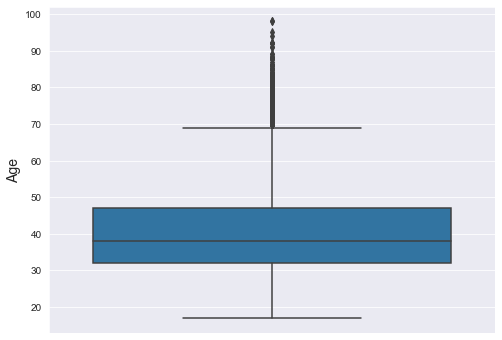

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(Bank_client['age'],orient='v')
plt.ylabel('Age',fontsize=14)
plt.show()

-  We can see there are outliers in the age column.
- The median age is 38. and above 70 are outliers.

In [14]:
print("Q1",Bank_client['age'].quantile(0.25))
print("Q2",Bank_client['age'].quantile(0.50))
print('Q3',Bank_client['age'].quantile(0.75))
print('Q4',Bank_client['age'].quantile(1.00))
print(Bank_client['age'].quantile(q = 0.75) + 
                      1.5*(Bank_client['age'].quantile(q = 0.75) -  Bank_client['age'].quantile(q = 0.25)), 'are outliers')

Q1 32.0
Q2 38.0
Q3 47.0
Q4 98.0
69.5 are outliers


In [15]:
(Bank_client[Bank_client['age']>=69])['age'].count()

503

 - We can see there are 503 outliers in the data but we are not going to remove them .
 - As we have distribution of all the ages.

## Job

In [16]:
Bank_client['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [17]:
Bank_client['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

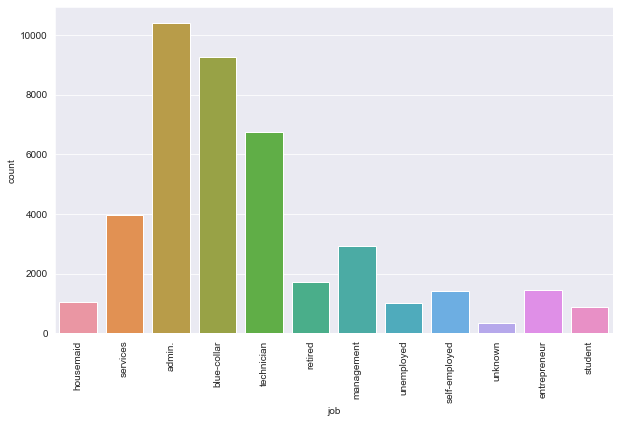

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(Bank_client['job'])
plt.xticks(rotation=90)
plt.show()

- job on admin had more people which is followed by blue-collar.
- unknown had least in number.

## Marital

In [19]:
Bank_client['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
Bank_client['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

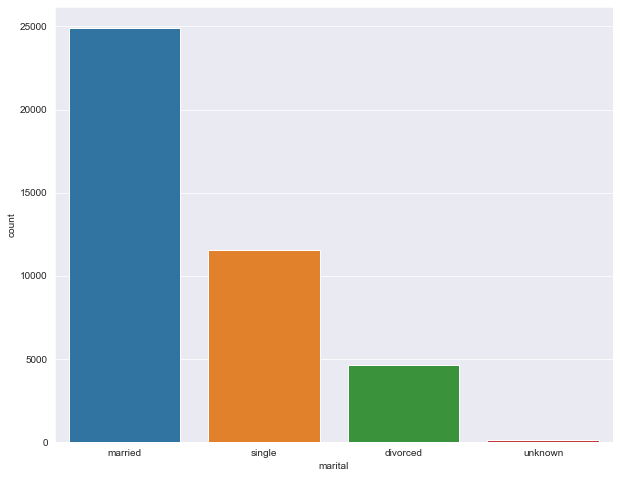

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(Bank_client['marital'])
plt.show()

In [22]:
Bank_client[(Bank_client['marital']=='unknown') & (Bank_client['job']=='unknown')]

,age,job,marital,education,default,housing,loan
1608,32,unknown,unknown,university.degree,no,no,no
4344,32,unknown,unknown,university.degree,no,yes,yes
7145,32,unknown,unknown,university.degree,no,yes,yes
11355,32,unknown,unknown,university.degree,no,no,no
14788,45,unknown,unknown,unknown,no,yes,yes
14789,45,unknown,unknown,unknown,no,yes,no
17344,49,unknown,unknown,unknown,unknown,yes,yes
17421,55,unknown,unknown,unknown,unknown,yes,no
17652,41,unknown,unknown,unknown,no,yes,no


## Education

In [23]:
Bank_client['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [24]:
Bank_client['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

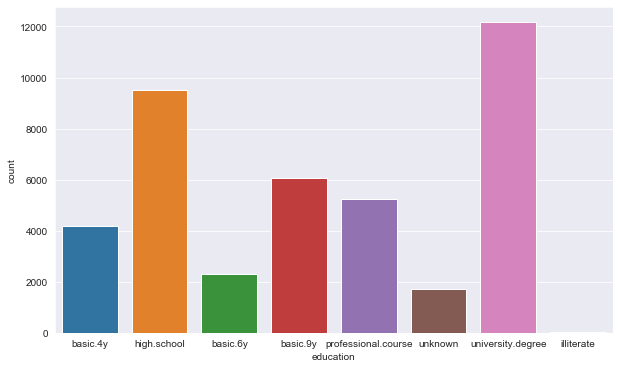

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(Bank_client['education'])
plt.show()

## Default,Housing ,Loan

In [26]:
Bank_client['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [27]:
Bank_client['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [28]:
Bank_client['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

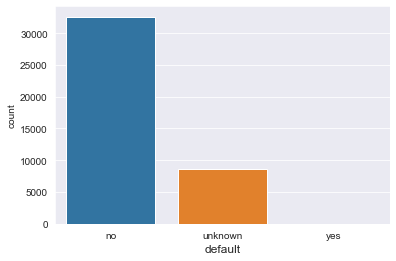

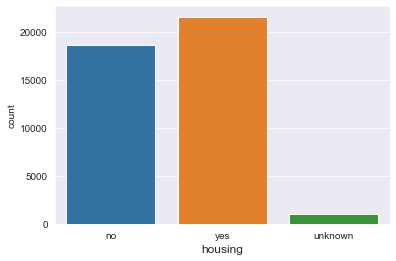

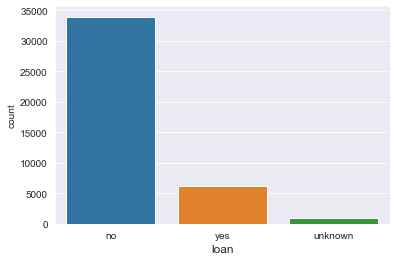

<Figure size 432x288 with 0 Axes>

In [29]:
features=['default','housing','loan']
for a,b in enumerate(features):
    plt.subplot(1,len(features),a+1)
    sns.countplot(Bank_client[b])               
    plt.xlabel(b,fontsize=12)
    plt.show()
plt.tight_layout()
    
    

#####  Insights:
- Many people didn't have a credit card in default.and very least people have credit card in default.
- Many people have housing loan compared when compared to the no housing loan.
- personal loan have been less for people.

In [30]:
print('Has Credit card in Default')
print('No credit in Default',Bank_client[Bank_client['default']=='no']['default'].count())
print('yes in Default',Bank_client[Bank_client['default']=='yes']['default'].count())
print('Unknown in Default',Bank_client[Bank_client['default']=='unknown']['default'].count())
print('\n')
print('Has Housing Loan')
print('No housing loan',Bank_client[Bank_client['housing']=='no']['housing'].count())
print('yes housig loan',Bank_client[Bank_client['housing']=='yes']['housing'].count())
print('Unknown',Bank_client[Bank_client['housing']=='unknown']['housing'].count())
print('\n')
print('Personal Loan')
print('No personal Loan',Bank_client[Bank_client['loan']=='no']['loan'].count())
print('yes',Bank_client[Bank_client['loan']=='yes']['loan'].count())
print('unknown',Bank_client[Bank_client['loan']=='unknown']['housing'].count())


eefffe

Has Credit card in Default
No credit in Default 32588
yes in Default 3
Unknown in Default 8597


Has Housing Loan
No housing loan 18622
yes housig loan 21576
Unknown 990


Personal Loan
No personal Loan 33950
yes 6248
unknown 990


In [31]:
#Converting categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Bank_client['job']=le.fit_transform(Bank_client['job'])
Bank_client

,age,job,marital,education,default,housing,loan
0,56,3,married,basic.4y,no,no,no
1,57,7,married,high.school,unknown,no,no
2,37,7,married,high.school,no,yes,no
3,40,0,married,basic.6y,no,no,no
4,56,7,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,5,married,professional.course,no,yes,no
41184,46,1,married,professional.course,no,no,no
41185,56,5,married,university.degree,no,yes,no
41186,44,9,married,professional.course,no,no,no


In [32]:
Bank_client=Bank_client[Bank_client.columns].apply(lambda x : le.fit_transform(x))

In [33]:
Bank_client.head()

,age,job,marital,education,default,housing,loan
0,39,3,1,0,0,0,0
1,40,7,1,3,1,0,0
2,20,7,1,3,0,2,0
3,23,0,1,1,0,0,0
4,39,7,1,3,0,0,2


### Related with the last contact of the current campaign

In [34]:
Bank_related=df.iloc[:,7:11]

In [35]:
Bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [36]:
Bank_related['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [37]:
Bank_related['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

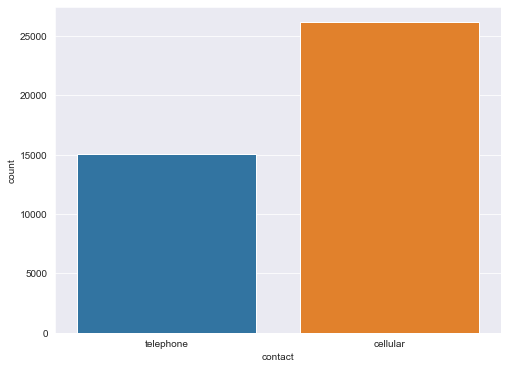

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(Bank_related['contact'])
plt.show()

In [39]:
Bank_related['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

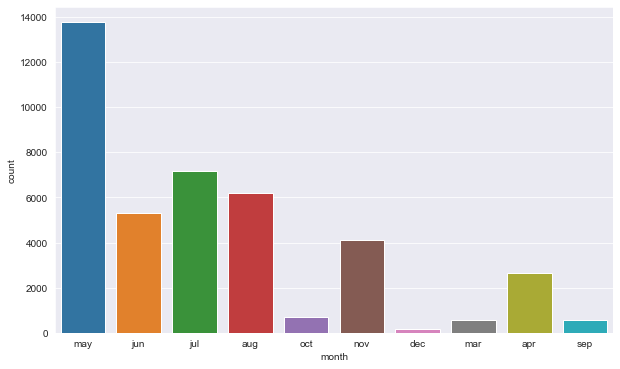

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(Bank_related['month'])
plt.show()

In [41]:
Bank_related['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

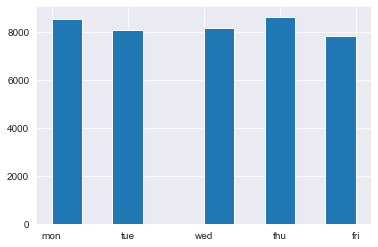

In [42]:
Bank_related['day_of_week'].hist()

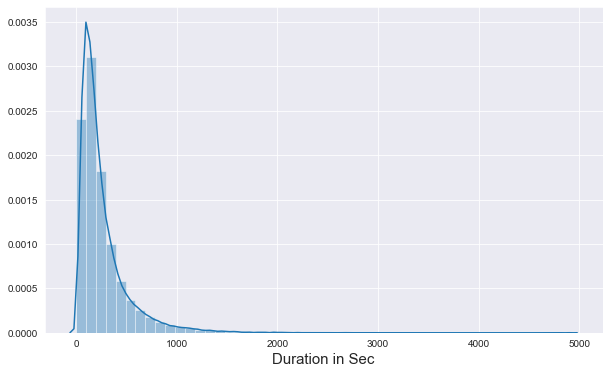

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(Bank_related['duration'])
plt.xlabel('Duration in Sec',fontsize=15)
plt.show()

In [44]:
Bank_related['duration'].max(),Bank_related['duration'].min()

(4918, 0)

In [45]:
print('Q1',Bank_related['duration'].quantile(0.25))
print('Q2',Bank_related['duration'].quantile(0.50))
print('Q3',Bank_related['duration'].quantile(0.75))
print('Q4',Bank_related['duration'].quantile(1.0))
print('Duration call above',Bank_related['duration'].quantile(0.75)+1.5*(Bank_related['duration'].quantile(0.75)-Bank_related['duration'].quantile(0.25)))

Q1 102.0
Q2 180.0
Q3 319.0
Q4 4918.0
Duration call above 644.5


In [46]:
Bank_related[Bank_related['duration']<=0] #This should be deleted as we know the duration is 0 it means not subscribed.

,contact,month,day_of_week,duration
6251,telephone,may,tue,0
23031,cellular,aug,tue,0
28063,cellular,apr,fri,0
33015,cellular,may,mon,0


In [47]:
Bank_related=Bank_related[Bank_related.columns].apply(lambda x: le.fit_transform(x))

In [48]:
Bank_related.head(10)

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
5,1,6,1,198
6,1,6,1,139
7,1,6,1,217
8,1,6,1,380
9,1,6,1,50


In [49]:
genre_mappings={index : label for index ,label in enumerate(Bank_related['month'])}
genre_mappings.items()

dict_items([(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6), (10, 6), (11, 6), (12, 6), (13, 6), (14, 6), (15, 6), (16, 6), (17, 6), (18, 6), (19, 6), (20, 6), (21, 6), (22, 6), (23, 6), (24, 6), (25, 6), (26, 6), (27, 6), (28, 6), (29, 6), (30, 6), (31, 6), (32, 6), (33, 6), (34, 6), (35, 6), (36, 6), (37, 6), (38, 6), (39, 6), (40, 6), (41, 6), (42, 6), (43, 6), (44, 6), (45, 6), (46, 6), (47, 6), (48, 6), (49, 6), (50, 6), (51, 6), (52, 6), (53, 6), (54, 6), (55, 6), (56, 6), (57, 6), (58, 6), (59, 6), (60, 6), (61, 6), (62, 6), (63, 6), (64, 6), (65, 6), (66, 6), (67, 6), (68, 6), (69, 6), (70, 6), (71, 6), (72, 6), (73, 6), (74, 6), (75, 6), (76, 6), (77, 6), (78, 6), (79, 6), (80, 6), (81, 6), (82, 6), (83, 6), (84, 6), (85, 6), (86, 6), (87, 6), (88, 6), (89, 6), (90, 6), (91, 6), (92, 6), (93, 6), (94, 6), (95, 6), (96, 6), (97, 6), (98, 6), (99, 6), (100, 6), (101, 6), (102, 6), (103, 6), (104, 6), (105, 6), (106, 6), (107, 6), (108, 6), (109, 6)

### Other attributes

In [50]:
Bank_other=df.loc[:,['campaign', 'pdays','previous', 'poutcome']]
Bank_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [51]:
Bank_other['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [52]:
Bank_other['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

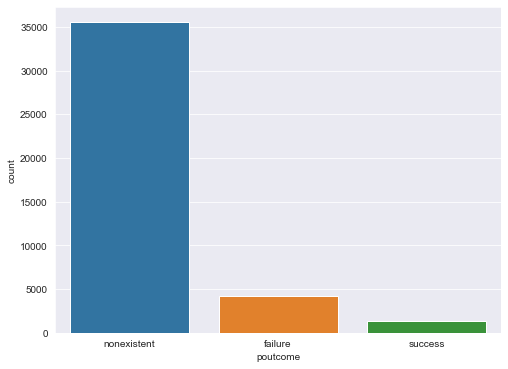

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(Bank_other['poutcome'])
plt.show()

In [54]:
Bank_other['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [55]:
Bank_other['campaign'].value_counts()[0:10]

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
Name: campaign, dtype: int64

In [56]:
Bank_other['pdays'].value_counts()[0:5]

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

<Figure size 432x288 with 0 Axes>

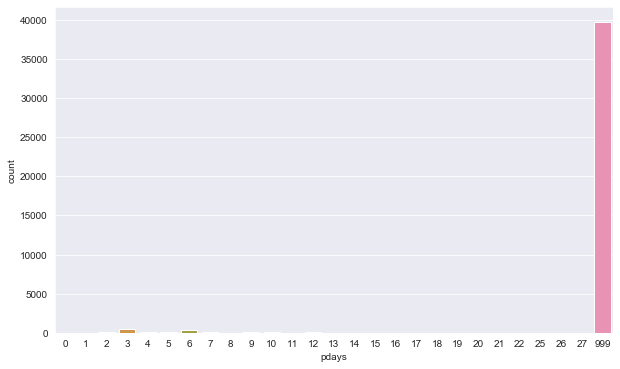

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(Bank_other['pdays'])
plt.figure()

-  It seems most of the customers previously hasn't contacted.

In [58]:
Bank_other['poutcome'].replace(['nonexistent', 'failure', 'success'],[1,2,3],inplace=True)

In [59]:
Bank_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


In [60]:
genre_maps={index:label for index,label in enumerate(Bank_other['poutcome'])}
genre_maps

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

### Social and economic context attributes

In [61]:
Bank_se=df.loc[:,['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
Bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


#### Concating the all the columns

In [62]:
Bank_final=pd.concat([Bank_client,Bank_related,Bank_other,Bank_se],axis=1)

In [63]:
Bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,40,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,20,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,23,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,39,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [64]:
Bank_final['y']=df['y']

In [65]:
Bank_final['y']=pd.get_dummies(Bank_final['y'],drop_first=True)

In [66]:
Bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,40,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,20,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,23,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,39,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [67]:
Bank_final.shape

(41188, 21)

In [68]:
#Removing the outliers as we already know when the duration is 0 it means customer hadn't subscribed to it.
outliers=Bank_final[Bank_final['duration']<=0].index

In [69]:
Bank_final.drop(labels=outliers,inplace=True)
Bank_final.shape

(41184, 21)

In [70]:
Bank_final['y'].value_counts()

0    36544
1     4640
Name: y, dtype: int64

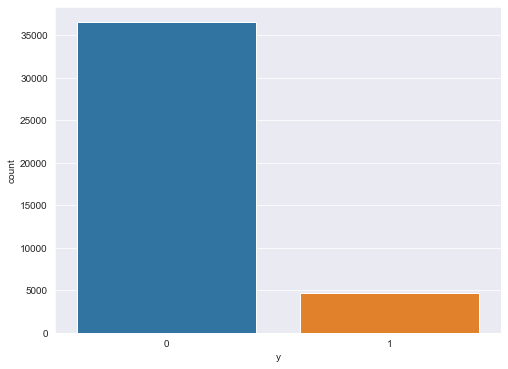

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(Bank_final['y'])
plt.show()

- It was an imbalanced dataset, so we need to balance it .

In [72]:
X=Bank_final.drop(columns=['y'])
y=Bank_final['y']

In [73]:
print(X.shape,y.shape)

(41184, 20) (41184,)


In [74]:
yes=Bank_final[Bank_final['y']=='yes']
no=Bank_final[Bank_final['y']=='no']
print(yes.shape,no.shape)

(0, 21) (0, 21)


In [75]:
from imblearn.combine import SMOTETomek
st=SMOTETomek(random_state=27)
X_res,Y_res=st.fit_sample(X,y)

In [76]:
print(X_res.shape,Y_res.shape)

(72780, 20) (72780,)


In [77]:
Y_res.value_counts()

1    36390
0    36390
Name: y, dtype: int64

# *Model Analysis*

In [78]:
#splitting into train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=27)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50946, 20)
(21834, 20)
(50946,)
(21834,)


In [80]:
#Standardizing the colummns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)  #standardizing xtrain
X_test=sc.transform(X_test)        #standardizing xtest

In [81]:
X_train

array([[ 0.16995053, -0.48355339, -0.17442948, ..., -1.14553998,
        -0.91019376, -0.42094713],
       [-0.43785662,  0.98941556, -1.83328413, ..., -0.47785617,
         1.05391575,  1.06335274],
       [-0.00370866, -1.07274097, -0.17442948, ...,  0.72397469,
         1.00045979,  0.6364727 ],
       ...,
       [ 1.29873525, -0.1889596 , -0.17442948, ..., -0.47785617,
         1.05179868,  1.06335274],
       [ 0.51726891, -1.07274097, -1.83328413, ..., -0.11539924,
        -0.90490109, -0.68443912],
       [ 0.6040985 ,  0.10563419, -1.83328413, ...,  0.72397469,
         0.99887199,  0.6364727 ]])

In [82]:
X_test

array([[-0.26419744, -0.77814718, -1.83328413, ...,  1.29591886,
        -1.21581839, -1.43098696],
       [-0.95883419,  1.28400935, -0.17442948, ...,  0.64529731,
         1.05444501,  1.06335274],
       [-0.61151581, -1.07274097, -0.17442948, ..., -0.47785617,
         1.05179868,  1.06335274],
       ...,
       [-0.69834541,  0.10563419,  1.48442517, ..., -0.34431941,
         0.60880227,  0.69170246],
       [ 0.95141687, -1.07274097, -1.83328413, ..., -0.34431941,
         0.58551453,  0.69170246],
       [-1.30615256, -0.77814718,  1.48442517, ..., -0.47785617,
         1.05444501,  1.06335274]])

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=5)
print('CV :',cv_score.mean())
print('Training Acc :',accuracy_score(y_train,Y_train_pred))
print('Testing Acc :',accuracy_score(y_test,Y_test_pred))

CV : 0.8877438627795315
Training Acc : 0.8881364582106545
Testing Acc : 0.8893468901712924


In [86]:
#classification report and confusion matrix on test data
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,Y_test_pred))

[[9584 1312]
 [1104 9834]]


In [87]:
print(classification_report(y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     10896
           1       0.88      0.90      0.89     10938

    accuracy                           0.89     21834
   macro avg       0.89      0.89      0.89     21834
weighted avg       0.89      0.89      0.89     21834



In [88]:
tn_lr=confusion_matrix(y_test,Y_test_pred)[0,0]
fp_lr=confusion_matrix(y_test,Y_test_pred)[0,1]
fn_lr=confusion_matrix(y_test,Y_test_pred)[1,0]
tp_lr=confusion_matrix(y_test,Y_test_pred)[1,1]

In [89]:
print(tn_lr,fp_lr,fn_lr,tp_lr)

9584 1312 1104 9834


In [92]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
ns_probs=[0 for i in range(len(y_test))]
lr_probs=lr.predict_proba(X_test)[:,1]

ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)

ns_fpr,ns_tpr,thre=roc_curve(y_test,ns_probs)
lr_fpr,lr_tpr,thre=roc_curve(y_test,lr_probs)
print('No skill Auc',ns_auc)
print('Logistic Auc',lr_auc)
roc=auc(lr_fpr,lr_tpr)
print(roc)

No skill Auc 0.5
Logistic Auc 0.9495596626721861
0.9495596626721861


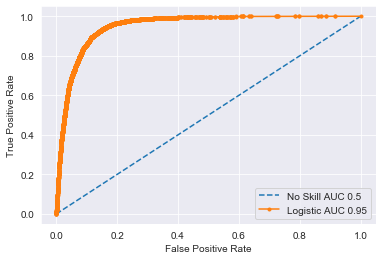

In [91]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No Skill AUC {}'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.',label='Logistic AUC {}'.format(round(lr_auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
cv_score=cross_val_score(Knn,X_train,y_train,cv=5,scoring='accuracy')
print("CV :",cv_score.mean())


CV : 0.9142622453297061


In [93]:
Y_train_pred=Knn.predict(X_train)
Y_test_pred=Knn.predict(X_test)

In [94]:
print("CV :",cv_score.mean())
print("Training Score",accuracy_score(y_train,Y_train_pred))
print('Testing score', accuracy_score(y_test,Y_test_pred))

CV : 0.9142622453297061
Training Score 0.941761865504652
Testing score 0.9181551708344783


### *Choosing K value*

In [95]:
# error_rate=[]
# for i in range(1,20,2):  #Changing k range so that it run fast
#     Knn=KNeighborsClassifier(n_neighbors=i)
#     Knn.fit(X_train,y_train)
#     Y_test_pred=Knn.predict(X_test)
#     error_rate.append(np.mean(Y_test_pred!=y_test))
    
# plt.figure(figsize=(10,6))
# plt.plot(range(1,20,2),error_rate,'b--',marker='o',markerfacecolor='red')
# plt.xlabel('K value')
# plt.ylabel('Error Rate')
# plt.show()    

    

In [96]:
Knn=KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train,y_train)
cv_score=cross_val_score(Knn,X_train,y_train,cv=5,scoring='accuracy')
Y_train_pred=Knn.predict(X_train)
Y_test_pred=Knn.predict(X_test)
print("CV :",cv_score.mean())
print("Training Score",accuracy_score(y_train,Y_train_pred))
print('Testing score', accuracy_score(y_test,Y_test_pred))

CV : 0.919051556591221
Training Score 1.0
Testing score 0.9231473848126774


In [97]:
print(confusion_matrix(y_test,Y_test_pred))

[[ 9825  1071]
 [  607 10331]]


In [98]:
from sklearn.metrics import precision_score,recall_score

In [99]:
precision_score(y_test,Y_test_pred)

0.9060691106823364

In [100]:
recall_score(y_test,Y_test_pred)

0.9445053940391296

In [102]:
ns_probs=[0 for i in range(len(y_test))]
knn_probs=Knn.predict_proba(X_test)[:,1]

ns_auc=roc_auc_score(y_test,ns_probs)
Knn_auc=roc_auc_score(y_test,knn_probs)





In [104]:
Knn_auc

0.9231062212486397

In [105]:
ns_fpr,ns_tpr,thre_n=roc_curve(y_test,ns_probs)

In [108]:
ns_fpr,ns_tpr,thre

(array([0., 1.]),
 array([0., 1.]),
 array([1.99999761e+00, 9.99997609e-01, 9.99974067e-01, ...,
        5.23616746e-03, 5.23550722e-03, 1.61968397e-06]))

In [109]:
Knn_fpr,Knn_tpr,thre_k=roc_curve(y_test,knn_probs)

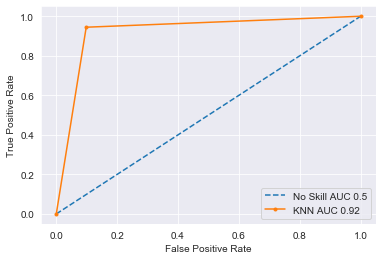

In [110]:
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No Skill AUC {}'.format(ns_auc))
plt.plot(Knn_fpr, Knn_tpr, marker='.',label='KNN AUC {}'.format(round(Knn_auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
cv_score=cross_val_score(dt,X_train,y_train,scoring='accuracy',cv=10)
print("CV :",cv_score.mean())


CV : 0.9250578505837075


In [118]:

for i in range(2,20,2):
    dt=DecisionTreeClassifier(max_depth=i)
    cv_score=cross_val_score(dt,X_train,y_train,scoring='accuracy',cv=10)
    print("CV :",cv_score.mean(),'---->',i)

CV : 0.814764395989355 ----> 2
CV : 0.8703726911492786 ----> 4
CV : 0.895163611060059 ----> 6
CV : 0.9064891058887806 ----> 8
CV : 0.9160876445301348 ----> 10
CV : 0.9216621644583306 ----> 12
CV : 0.9243512177153903 ----> 14
CV : 0.924567196567148 ----> 16
CV : 0.9258233184723854 ----> 18


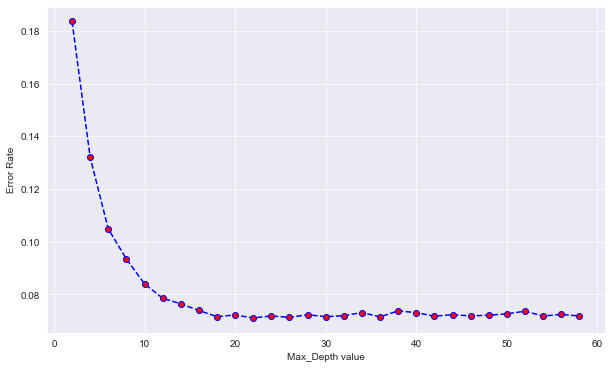

In [121]:
error_rate=[]
for i in range(2,60,2):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    y_test_pred=dt.predict(X_test)
    error_rate.append(np.mean(y_test_pred!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(2,60,2),error_rate,'b--',marker='o',markerfacecolor='red')
plt.xlabel('Max_Depth value')
plt.ylabel('Error Rate')
plt.show()

In [123]:
dt=DecisionTreeClassifier(max_depth=18)
dt.fit(X_train,y_train)
cv_score=cross_val_score(dt,X_train,y_train,scoring='accuracy',cv=10)
print("CV :",cv_score.mean())

CV : 0.9260981516094093


In [124]:
Y_train_pred=dt.predict(X_train)
Y_test_pred=dt.predict(X_test)
print(confusion_matrix(y_train,Y_train_pred))
print("--"*30)
print(confusion_matrix(y_test,Y_test_pred))

[[24991   503]
 [  154 25298]]
------------------------------------------------------------
[[ 9996   900]
 [  647 10291]]


In [126]:
print(accuracy_score(y_train,Y_train_pred))
print(accuracy_score(y_test,Y_test_pred))

0.9871039924626075
0.9291472016121645


In [133]:
error_rate=[]
for i in range(2,30,2):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    y_test_pred=dt.score(X_test,y_test)
    error_rate.append(y_test_pred)
    #error_rate.append(np.mean(y_test_pred!=y_test))
# plt.figure(figsize=(10,6))
# plt.plot(range(2,60,2),error_rate,'b--',marker='o',markerfacecolor='red')
# plt.xlabel('Max_Depth value')
# plt.ylabel('Error Rate')
# plt.show()

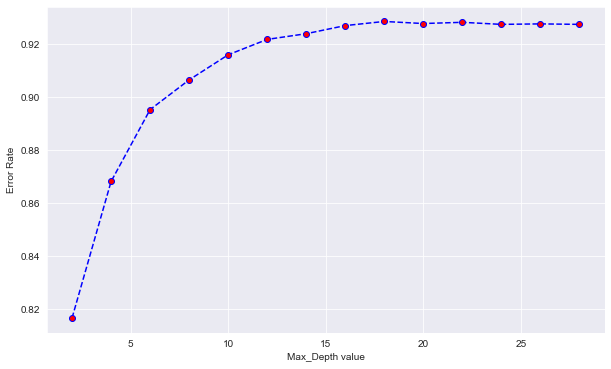

In [135]:
plt.figure(figsize=(10,6))
plt.plot(range(2,30,2),error_rate,'b--',marker='o',markerfacecolor='red')
plt.xlabel('Max_Depth value')
plt.ylabel('Error Rate')
plt.show()